In [74]:
import re
import os
import sys
import fileinput
import csv
import matplotlib.pyplot as plt
from contextlib import contextmanager
from itertools import groupby
from collections import namedtuple
import numpy as np

Stat = namedtuple('stat', ['version', 'n', 'cells_p_s'])

def read_stats(path):
    with open(path) as ifile:
        reader = csv.DictReader(ifile, fieldnames=Stat._fields)
        next(reader) # skip header
        for row in reader:
            row['n'] = int(row['n'])
            row['cells_p_s'] = float(row['cells_p_s'])
            stat = Stat(**row)
            yield stat

PStat = namedtuple('pstat', ['version', 'n', 'threads', 'cells_p_s'])

def read_pstats(path):
    with open(path) as ifile:
        reader = csv.DictReader(ifile, fieldnames=PStat._fields)
        next(reader) # skip header
        for row in reader:
            row['n'] = int(row['n'])
            row['threads'] = int(row['threads'])
            row['cells_p_s'] = float(row['cells_p_s'])
            stat = PStat(**row)
            yield stat

Text(0.5, 1.0, 'Comparación de Celdas/s')

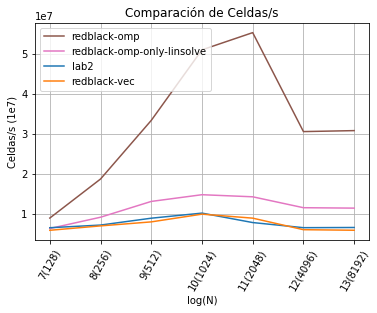

In [87]:
stats = read_stats('seq_results/stats.csv')

stats_sorted = sorted(stats, key=lambda s: s.version)
stats_groupped = groupby(stats_sorted, key=lambda s: s.version)

pstats = read_pstats('parallel_results/stats.csv')

pstats_sorted = sorted(pstats, key=lambda s: s.version)
pstats_groupped = groupby(pstats_sorted, key=lambda s: s.version)

fig, ax = plt.subplots()
ns = set()
for ix, (version, version_stats) in enumerate(pstats_groupped):
    xs = []
    ys = []
    vstats_sorted = sorted(version_stats, key=lambda s: s.n)
    vstats_groupped = groupby(vstats_sorted, key=lambda s: s.n)
    for jx, (n, n_stats) in enumerate(vstats_groupped):
        xs.append(int(np.log2(n)))
        ys.append(max([s.cells_p_s for s in n_stats]))
        ns.add(int(np.log2(n)))
    ax.plot(xs, ys, color='C{}'.format(ix +5), label=version)


for ix, (version, version_stats) in enumerate(stats_groupped):
    xs = []
    ys = []
    for s in version_stats:
        xs.append(int(np.log2(s.n)))
        ys.append(s.cells_p_s)
        ns.add(int(np.log2(s.n)))
    ax.plot(xs, ys, color='C{}'.format(ix), label=version)

ax.grid()
ax.legend(loc="upper left")
ax.set_xticks(list(ns))
ax.set_xticklabels(["{}({})".format(n, 2**n) for n in ns], rotation=60)
ax.set_xlabel('log(N)')
ax.set_ylabel('Celdas/s (1e7)')
ax.set_title('Comparación de Celdas/s')

Text(0.5, 1.0, 'Comparación de Celdas/s')

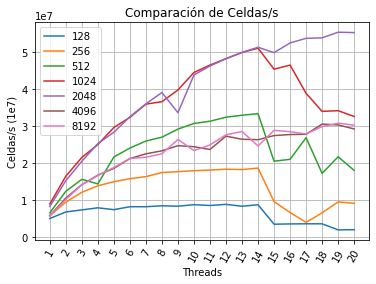

In [90]:
pstats = read_pstats('parallel_results/stats.csv')

pstats_sorted = sorted(pstats, key=lambda s: s.n)
pstats_groupped = groupby(pstats_sorted, key=lambda s: s.n)

fig, ax = plt.subplots()
threads = set()
for ix, (n, n_stats) in enumerate(pstats_groupped):
    xs = []
    ys = []
    n_stats_sorted = sorted(n_stats, key=lambda s: s.threads)
    for stat in n_stats_sorted:
        xs.append(stat.threads)
        ys.append(stat.cells_p_s)
        threads.add(stat.threads)
    ax.plot(xs, ys, color='C{}'.format(ix), label=n)

ax.grid()
ax.legend(loc="upper left")
ax.set_xticks(list(threads))
ax.set_xticklabels(threads, rotation=60)
ax.set_xlabel('Threads')
ax.set_ylabel('Celdas/s (1e7)')
ax.set_title('Comparación de Celdas/s')

Text(0.5, 1.0, 'Comparación de Celdas/s')

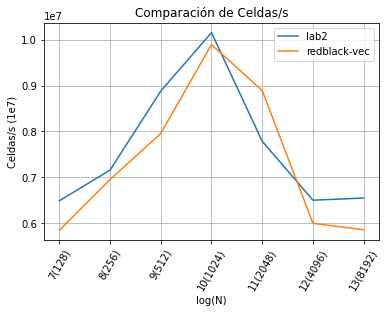

In [84]:
stats = read_stats('seq_results/stats.csv')

stats_sorted = sorted(stats, key=lambda s: s.version)
stats_groupped = groupby(stats_sorted, key=lambda s: s.version)

fig, ax = plt.subplots()
ns = set()

for ix, (version, version_stats) in enumerate(stats_groupped):
    xs = []
    ys = []
    for s in version_stats:
        xs.append(int(np.log2(s.n)))
        ys.append(s.cells_p_s)
        ns.add(int(np.log2(s.n)))
    ax.plot(xs, ys, color='C{}'.format(ix), label=version)

ax.grid()
ax.legend(loc="upper right")
ax.set_xticks(list(ns))
ax.set_xticklabels(["{}({})".format(n, 2**n) for n in ns], rotation=60)
ax.set_xlabel('log(N)')
ax.set_ylabel('Celdas/s (1e7)')
ax.set_title('Comparación de Celdas/s')